<a href="https://colab.research.google.com/github/ElizabethTeena/Data_Visualization/blob/main/Final_Elizabeth_EDA_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Upload a file manually
from google.colab import files
uploaded = files.upload()


Saving time_series_19-covid-Confirmed_archived_0325.csv to time_series_19-covid-Confirmed_archived_0325.csv


In [ ]:


# Import libraries
import pandas as pd

# Load the Confirmed and Deaths datasets
df_confirmed = pd.read_csv('/content/time_series_19-covid-Confirmed_archived_0325.csv')


# Check rows, columns and head BEFORE cleaning
print(f"Confirmed Cases Before Cleaning: {df_confirmed.shape[0]} rows and {df_confirmed.shape[1]} columns")


print("\nConfirmed head():")
df_confirmed.head()



Confirmed Cases Before Cleaning: 501 rows and 66 columns

Confirmed head():


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0


In [ ]:
# Check for missing values
print(df_confirmed.isnull().sum())


# Drop rows if Province/State or Country/Region is missing
df_confirmed_cleaned = df_confirmed.dropna(subset=['Province/State', 'Country/Region'])


# Drop duplicate rows
df_confirmed_cleaned = df_confirmed_cleaned.drop_duplicates()


# Check rows, columns and head AFTER cleaning
print(f"\nConfirmed Cases After Cleaning: {df_confirmed_cleaned.shape[0]} rows and {df_confirmed_cleaned.shape[1]} columns")

print("\nConfirmed Cleaned head():")
df_confirmed_cleaned.head()



Province/State    174
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
3/19/20             0
3/20/20             0
3/21/20             0
3/22/20             0
3/23/20           192
Length: 66, dtype: int64

Confirmed Cases After Cleaning: 327 rows and 66 columns

Confirmed Cleaned head():


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,64,73,103,103,186,231,271,424,424,424.0
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,112,134,171,210,267,307,353,436,533,533.0
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,49,57,71,94,121,121,121,229,296,296.0
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,46,61,68,78,94,144,184,221,221,221.0
19,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,19,20,29,29,37,42,50,67,100,100.0


In [ ]:
# Describe numeric columns
print(df_confirmed_cleaned.describe())



              Lat        Long     1/22/20     1/23/20     1/24/20     1/25/20  \
count  327.000000  327.000000  327.000000  327.000000  327.000000  327.000000   
mean    35.688733  -59.342935    1.678899    1.969419    2.825688    4.314985   
std     14.905419   78.656700   24.609046   24.703747   30.762252   42.822954   
min    -41.454500 -157.858400    0.000000    0.000000    0.000000    0.000000   
25%     33.758850 -105.128300    0.000000    0.000000    0.000000    0.000000   
50%     38.897400  -83.336200    0.000000    0.000000    0.000000    0.000000   
75%     42.295450  -71.520950    0.000000    0.000000    0.000000    0.000000   
max     71.706900  165.618000  444.000000  444.000000  549.000000  761.000000   

           1/26/20      1/27/20      1/28/20      1/29/20  ...       3/14/20  \
count   327.000000   327.000000   327.000000   327.000000  ...    327.000000   
mean      6.385321     8.840979    16.896024    18.669725  ...    282.192661   
std      59.852771    80.64825

In [ ]:
import plotly.express as px

# Group confirmed cases by Country/Region
df_country = df_confirmed_cleaned.groupby('Country/Region').sum().reset_index()

# Drop 'Lat' and 'Long' columns if present
if 'Lat' in df_country.columns:
    df_country = df_country.drop(columns=['Lat', 'Long'])

# Latest date (last column)
latest_date = df_country.columns[-1]

# Create choropleth map
fig = px.choropleth(
    df_country,
    locations="Country/Region",
    locationmode="country names",
    color=latest_date,
    hover_name="Country/Region",
    color_continuous_scale="Viridis",
    title=f"COVID-19 Confirmed Cases Worldwide ({latest_date})"
)

fig.show()


In [ ]:
import plotly.express as px

# Prepare the data
df_country_time = df_confirmed_cleaned.drop(columns=['Province/State', 'Lat', 'Long'])
df_country_time = df_country_time.groupby('Country/Region').sum().reset_index()

# Now we 'melt' the data — convert columns of dates into rows
df_country_time_melted = df_country_time.melt(
    id_vars=["Country/Region"],
    var_name="Date",
    value_name="Confirmed"
)

# Create animated choropleth
fig = px.choropleth(
    df_country_time_melted,
    locations="Country/Region",
    locationmode="country names",
    color="Confirmed",
    hover_name="Country/Region",
    animation_frame="Date",
    color_continuous_scale="Plasma",
    range_color=[0, df_country_time_melted["Confirmed"].max()],
    title="COVID-19 Confirmed Cases Over Time (Animated Choropleth)"
)

fig.show()


In [ ]:
import plotly.express as px

# Step 1: Prepare correct data
latest_date = df_confirmed_cleaned.columns[-1]  # Latest date

# Include 'Country/Region' in the DataFrame
df_density = df_confirmed_cleaned[['Country/Region', 'Lat', 'Long', latest_date]]
df_density = df_density.dropna()

# Step 2: Create improved density map
fig_density = px.density_mapbox(
    df_density,
    lat='Lat',
    lon='Long',
    z=latest_date,
    hover_name='Country/Region',  # Now 'Country/Region' is available
    radius=25,  # Increase radius to spread influence
    center=dict(lat=0, lon=0),
    zoom=1,
    mapbox_style="carto-positron",  # Clean white background
    color_continuous_scale="Hot",  # Better glowing scale
    range_color=[0, 1000],  # Cap maximum to 1000 confirmed cases for better color contrast
    title=f"COVID-19 Confirmed Cases Density Map ({latest_date})"
)

fig_density.show()

In [ ]:
import plotly.express as px

# Prepare data
latest_date = df_confirmed_cleaned.columns[-1]
df_country_cases = df_confirmed_cleaned.groupby('Country/Region')[latest_date].sum().reset_index()

# Sort countries by confirmed cases (optional, for better view)
df_country_cases = df_country_cases.sort_values(by=latest_date, ascending=False)

# Create bar plot (NOT histogram)
fig_bar = px.bar(
    df_country_cases,
    x='Country/Region',
    y=latest_date,
    title=f"COVID-19 Confirmed Cases by Country ({latest_date})",
    labels={'Country/Region': 'Country', latest_date: 'Confirmed Cases'},
    hover_data={'Country/Region': True, latest_date: True},
)

# Improve layout: rotate x-axis labels if needed
fig_bar.update_layout(xaxis_tickangle=45)

fig_bar.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Step 1: Prepare data
df = df_confirmed_cleaned.copy()

# Drop extra columns
df_country_time = df.drop(columns=['Province/State', 'Lat', 'Long'])

# Group by country
df_country_time = df_country_time.groupby('Country/Region').sum().reset_index()

# Pick a particular date
selected_date = '3/23/20'  # <-- Change this date to what you want

# Step 2: Create Box Plot for that specific date
df_selected = df_country_time[['Country/Region', selected_date]]

fig = px.box(
    df_selected,
    y=selected_date,
    points="all",  # Show all country points
    labels={selected_date: "Confirmed Cases"},
    title=f"Spread of COVID-19 Confirmed Cases Across Countries on {selected_date}",
    hover_data={'Country/Region': True}
)

fig.show()


In [ ]:
import plotly.express as px

# Prepare data
latest_date = df_confirmed_cleaned.columns[-1]  # Latest date
df_country_cases = df_confirmed_cleaned.groupby('Country/Region')[latest_date].sum().reset_index()

# Create histogram
fig_hist = px.histogram(
    df_country_cases,
    x=latest_date,
    nbins=50,  # Number of bins (you can adjust)
    title=f"Distribution of COVID-19 Confirmed Cases Across Countries ({latest_date})",
    labels={latest_date: "Confirmed Cases"},
    hover_data={'Country/Region': False},  # No extra hover info
)

# Improve layout
fig_hist.update_layout(
    xaxis_title="Confirmed Cases (Binned)",
    yaxis_title="Number of Countries",
    bargap=0.1
)

fig_hist.show()


In [ ]:
#INTERACTIVE VISUALIZATION FOR THE ABOVE GRAPHS WITH DROPDOWN WIDGETS AND HOVERING OVER FEATURE

In [ ]:
# Imports
!pip install dash --quiet
import pandas as pd
import dash
from dash import dcc, html, Input, Output
import plotly.express as px

# Prepare your data
df = df_confirmed_cleaned.copy()
date_cols = [c for c in df.columns if c not in ['Province/State','Country/Region','Lat','Long']]

# Create Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("COVID-19 Interactive Visualization"),

    # Dropdown for selecting date
    dcc.Dropdown(
        id='date-dropdown',
        options=[{'label': d, 'value': d} for d in date_cols],
        value=date_cols[-1],
        clearable=False
    ),

    # Dropdown for selecting visualization type
    dcc.Dropdown(
        id='visualization-dropdown',
        options=[
            {'label': 'Bar Chart (Histogram)', 'value': 'hist'},
            {'label': 'Box Plot', 'value': 'box'}
        ],
        value='hist',
        clearable=False
    ),

    # Graph
    dcc.Graph(id='graph-output')
])

# Callback to update graph based on both dropdowns
@app.callback(
    Output('graph-output', 'figure'),
    Input('date-dropdown', 'value'),
    Input('visualization-dropdown', 'value')
)
def update_graph(selected_date, selected_visualization):
    df_country = df.groupby('Country/Region')[selected_date].sum().reset_index()
    df_country = df_country.sort_values(by=selected_date, ascending=False)

    if selected_visualization == 'hist':
        fig = px.bar(
            df_country.head(20),
            x='Country/Region',
            y=selected_date,
            labels={'Country/Region': 'Country', selected_date: 'Confirmed Cases'},
            title=f"Top 20 Countries by Confirmed Cases on {selected_date}",
            hover_data={selected_date: True}
        )
        fig.update_layout(xaxis_tickangle=-45)
    else:
        fig = px.box(
            df_country,
            y=selected_date,
            points="all",
            labels={selected_date: "Confirmed Cases"},
            title=f"Spread of COVID-19 Confirmed Cases Across Countries on {selected_date}",
            hover_data={'Country/Region': True, selected_date: True}
        )

    return fig

# Run the server
app.run(debug=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.1 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

In [ ]:
#TIME SERIES VISUALIZATION WITH SCRUBBING

In [ ]:
import pandas as pd
import plotly.express as px

# Step 1: Prepare data
df = df_confirmed_cleaned.copy()

# Drop extra columns
df_country_time = df.drop(columns=['Province/State', 'Lat', 'Long'])

# Group by country
df_country_time = df_country_time.groupby('Country/Region').sum().reset_index()

# Melt the data
df_melted = df_country_time.melt(
    id_vars=['Country/Region'],
    var_name='Date',
    value_name='Confirmed'
)

# Convert Date to datetime
df_melted['Date'] = pd.to_datetime(df_melted['Date'], format='%m/%d/%y')

# Step 2: (Optional) Pick Top 10 Countries with highest cases
latest_date = df_melted['Date'].max()
top_countries = (df_melted[df_melted['Date'] == latest_date]
                 .sort_values('Confirmed', ascending=False)
                 .head(10)['Country/Region']
                 .tolist())

df_top = df_melted[df_melted['Country/Region'].isin(top_countries)]

# Step 3: Create animated time-series line plot
fig = px.line(
    df_top,
    x='Date',
    y='Confirmed',
    color='Country/Region',
    title="Top 10 Countries - COVID-19 Confirmed Cases Over Time",
    labels={'Confirmed': 'Confirmed Cases', 'Date': 'Date'},
)

# Add a play and pause button for animation (scrubbing effect)
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True),  #  SCRUBBING SLIDER
        type="date"
    ),
    yaxis_title="Confirmed Cases",
    legend_title="Country",
    title_x=0.5
)

fig.show()


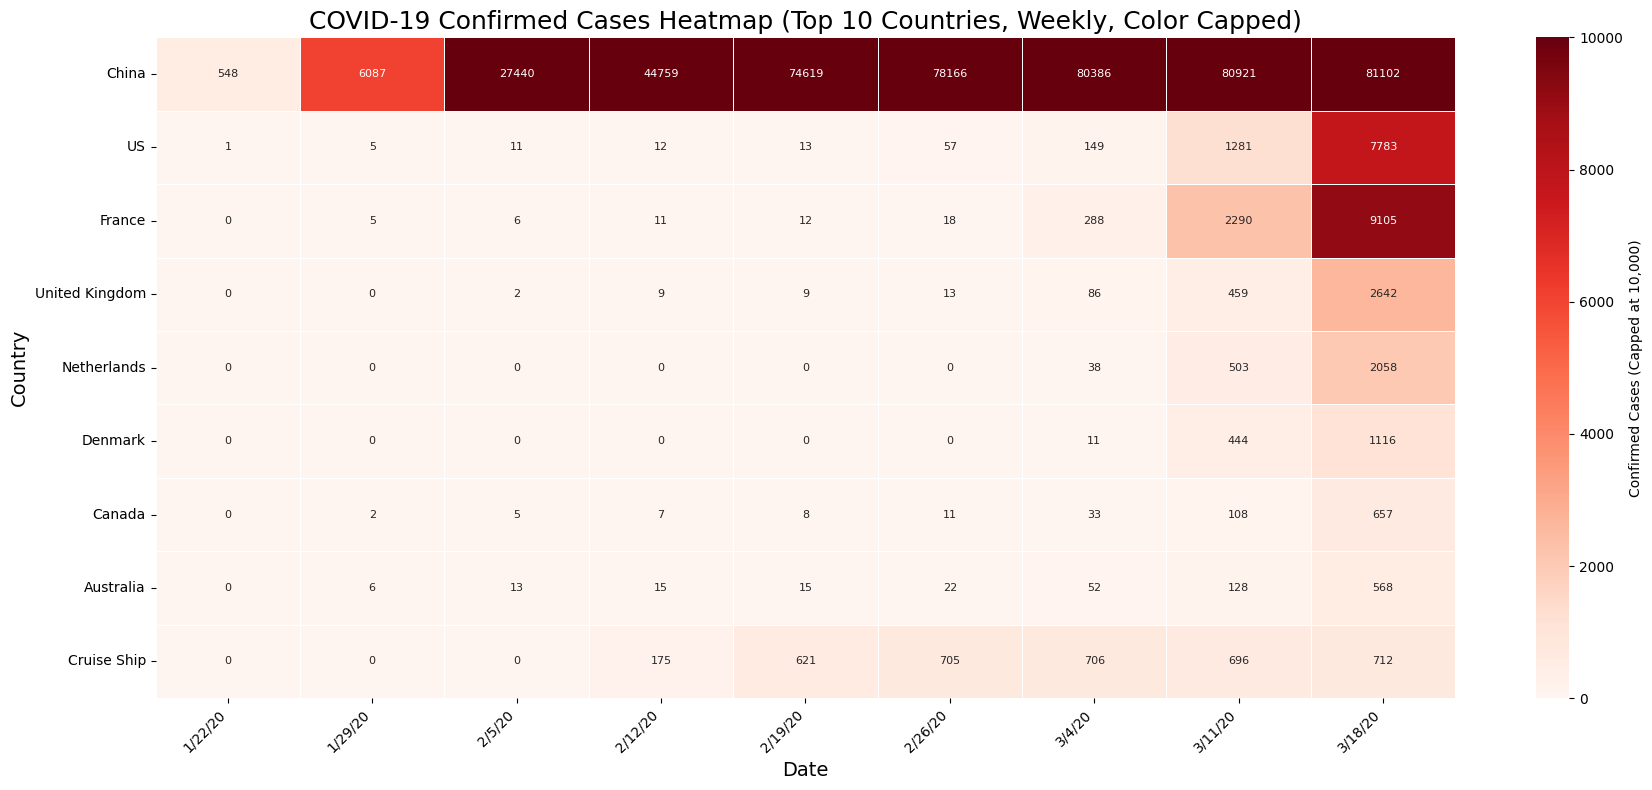

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare data
df = df_confirmed_cleaned.copy()

df_country_time = df.drop(columns=['Province/State', 'Lat', 'Long'])
df_country_time = df_country_time.groupby('Country/Region').sum()

# Select top 10 countries
top_countries = df_country_time[df_country_time.columns[-1]].sort_values(ascending=False).head(10).index
df_top = df_country_time.loc[top_countries]

# Reduce dates: weekly view
df_top = df_top.iloc[:, ::7]  # Pick every 7th day

# 2. Plot heatmap with capped color range
plt.figure(figsize=(18, 8))

sns.heatmap(
    df_top,
    annot=True,
    fmt=".0f",
    cmap="Reds",
    linewidths=0.5,
    linecolor='white',
    vmin=0,         #  Minimum value (always 0)
    vmax=10000,     #  Maximum cap for color intensity
    cbar_kws={"label": "Confirmed Cases (Capped at 10,000)"},
    annot_kws={"size":8}
)

plt.title('COVID-19 Confirmed Cases Heatmap (Top 10 Countries, Weekly, Color Capped)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# 1. Prepare data
df = df_confirmed_cleaned.copy()

df_country_time = df.drop(columns=['Province/State', 'Lat', 'Long'])
df_country_time = df_country_time.groupby('Country/Region').sum()

# Select top 10 countries
top_countries = df_country_time[df_country_time.columns[-1]].sort_values(ascending=False).head(10).index
df_top = df_country_time.loc[top_countries]

# Weekly sampling (every 7th day)
df_top = df_top.iloc[:, ::7]

# Melt into long format
df_melted = df_top.reset_index().melt(id_vars='Country/Region', var_name='Date', value_name='Confirmed')

# Convert Date column to string if needed
df_melted['Date'] = df_melted['Date'].astype(str)

# 2. Create interactive heatmap
fig = px.density_heatmap(
    df_melted,
    x='Date',
    y='Country/Region',
    z='Confirmed',
    color_continuous_scale='Reds',
    range_color=[0, 10000],  # cap confirmed cases at 10,000
    title="COVID-19 Confirmed Cases Heatmap (Hover Enabled, Top 10 Countries)",
    labels={'Confirmed': 'Confirmed Cases', 'Date': 'Date', 'Country/Region': 'Country'},
    hover_data={'Country/Region': True, 'Date': True, 'Confirmed': True}
)

fig.update_layout(
    xaxis_nticks=20,
    yaxis_title="Country",
    xaxis_title="Date",
    title_x=0.5
)

fig.show()
